<a href="https://colab.research.google.com/github/jeftersantiago/itp2023/blob/main/Distribui%C3%A7%C3%A3o_de_Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed

from scipy.stats import binom
from scipy.special import factorial

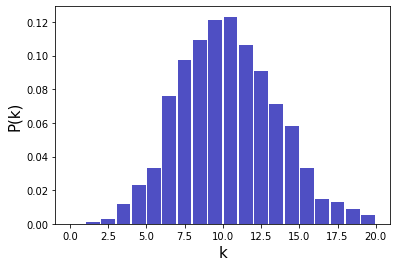

In [ ]:
lbd = 10 
n = 1000 
P = np.random.poisson(lbd, n)
k = np.arange(0, np.max(P))
count, bins, ignored = plt.hist(P, bins=k, density=True, color='#0504aa',alpha=0.7, 
                                rwidth=0.9)
plt.xlabel('k', fontsize = 15)
plt.ylabel('P(k)',fontsize = 15)
plt.show(True)

## Lei dos eventos raros

Quando aumentamos o numero de experimentos a distribuição de Poisson fica mais precisa, com a probabilidade e sucesso próximas de zero, ou seja 

$$ \lim_{n\to\infty, p\to 0} \frac{n!}{(n-k)!k!}p^k (1-p)^{n-k} = \frac{e^{-\lambda} \lambda^{k}}{k!}$$


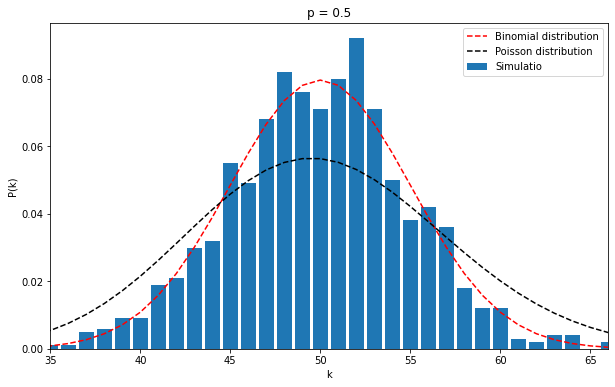

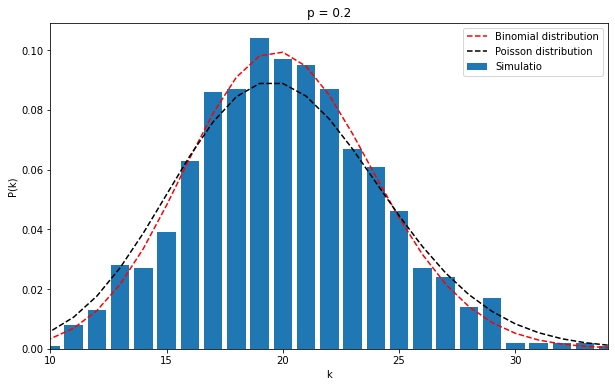

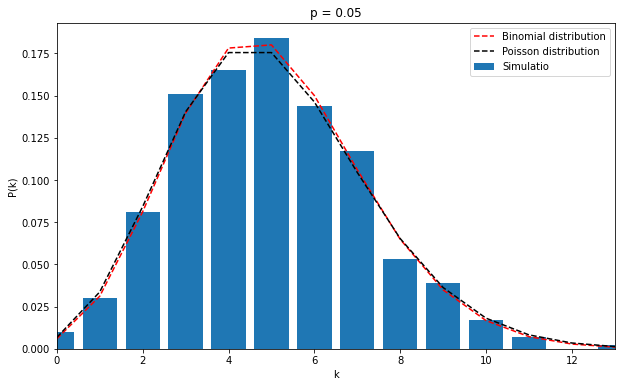

In [ ]:
seed(100)

vp = [0.5, 0.2, 0.05]
n = 100

for p in vp:

  Pk = np.zeros(n)
  vk = np.arange(0, n)
  nSimulations = 1000

  # simulation
  for j in range(0, nSimulations):

    success = 0
    for i in range(0, n):
      r = np.random.uniform()
      if(r <= p):
        success+=1
    Pk[success]+=1
  Pk=Pk/sum(Pk) # normalization

  # visualization

  plt.figure(figsize=(10, 6))
  plt.xlim(np.min(vk[Pk>0]), np.max(vk[Pk>0]))
  plt.bar(vk, Pk, label = "Simulatio")



  # Binomial distribution

  Pkt = np.zeros(n+1)
  vkt = np.arange(0, n+1)
  for k in range(0, n+1):
    Pkt[k] = (factorial(n)/(factorial(n-k)*factorial(k)) * (p**k)*(1-p)**(n-k))
  plt.plot(vkt, Pkt, 'r--', label = "Binomial distribution")

  # Poisson distribution

  Poisson = np.zeros(n+1)
  vp = np.arange(0, n+1)
  lbd = n * p
  for k in range(0, n+1):
    Poisson[k] = (np.exp(-lbd)*lbd**k)/factorial(k)

  plt.plot(vp, Poisson, 'k--', label = "Poisson distribution")
  plt.title("p = " + str(p))
  plt.xlabel("k")
  plt.ylabel("P(k)")
  plt.legend()
  plt.show()